In [1]:
import warnings

import jiwer
from PIL import Image
import torch

from vietocr_api import load_vietocr_detector

In [2]:
warnings.filterwarnings('ignore')

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

device

'cuda:0'

In [4]:
detector = load_vietocr_detector(device=device)

Model weight C:\Users\C15TQK\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


 Reference : MỆNH GIÁ VỀ THU PHÍ ĐƯỜNG BỘ TOÀN QUỐC
Hypothesis : MỆNH GIÁ VỀ THU PHÍ DƯỜNG BỘ TOÀN QUỐC

 Character Error Rate (CER) : 2.63%
      Word Error Rate (WER) : 11.11%
     Match Error Rate (MER) : 11.11%
      Word Info. Lost (WIL) : 20.99%
 Word Info. Preserved (WIP) : 79.01%


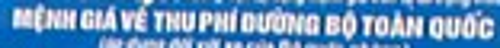

In [9]:
image = Image.open('assets/sample.png')
gold = 'MỆNH GIÁ VỀ THU PHÍ ĐƯỜNG BỘ TOÀN QUỐC'

result = detector.predict(image)
cer = jiwer.cer(gold, result)
wer = jiwer.wer(gold, result)
mer = jiwer.mer(gold, result)
wil = jiwer.wil(gold, result)
wip = jiwer.wip(gold, result)

print(' Reference : {}'.format(gold))
print('Hypothesis : {}'.format(result))
print()
print(' Character Error Rate (CER) : {:.2%}'.format(cer))
print('      Word Error Rate (WER) : {:.2%}'.format(wer))
print('     Match Error Rate (MER) : {:.2%}'.format(mer))
print('      Word Info. Lost (WIL) : {:.2%}'.format(wil))
print(' Word Info. Preserved (WIP) : {:.2%}'.format(wip))
t = 500
image.resize((t, int(image.height * t / image.width)))